In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats as sms
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%run "util_formula.py"

from sklearn.model_selection import KFold

def CrossValidation(formula, kf, dataset, response):
    results = pd.DataFrame({'R2':[],'AR2':[],"AIC":[], "BIC":[],"MSE":[]})
    
    # evaluate all accuracy based on the folds
    for train_index, test_index in kf.split(dataset):
        d_train, d_test = dataset.ix[train_index,:], dataset.ix[test_index,:]
        lmfit = smf.ols(formula, d_train).fit();
        pred = lmfit.predict(d_test)
        mse = (np.power(pred - d_test[response],2)).mean()
        results = results.append({'R2':lmfit.rsquared,'AR2':lmfit.rsquared_adj, "AIC": lmfit.aic, "BIC": lmfit.bic,"MSE":mse},ignore_index=True);
        
    # Wrap everything up in a nice dataframe
    return results;


def kfoldplot(result):
    fig, axes = plt.subplots(figsize=(7,4), nrows=1, ncols=1, sharey=False)
    fig.subplots_adjust(hspace=0.1, wspace=0.2)

    axes.plot(result['MSE'])
    axes.set_xlabel('Cross-validation Fold')
    axes.set_ylabel('MSE')
    axes.hlines(xmin=0, xmax=29,y=result['MSE'].mean(), colors='r')
    axes.set_xlim([0, 29])
    axes.legend(['MSE', 'Mean'])
    print('Mean: ' + str(result['MSE'].mean()) + ' Std: ' + str(result['MSE'].std()))


# Applying transformation

In [2]:
df = pd.read_csv('P1train.csv', header=0)

print(list(df.columns.values))
df.dropna(subset=['HilaryPercent'], how='all', inplace = True)

df['SQRT_RHI225214'] = np.power(df['RHI225214'],0.5)
df['LOG_INC910213'] = np.log(df['INC910213'])

['state_abbreviation', 'PST045214', 'PST040210', 'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213', 'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213', 'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213', 'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210', 'Bernie Sanders', 'Donald Trump', 'Hillary Clinton', 'John Kasich', 'Ted Cruz', 'HilaryPercent']


In [3]:
candidate1= ['state_abbreviation', 'SQRT_RHI225214', 'POP815213', 'EDU685213','LOG_INC910213']
interactions = []

for c1 in candidate1:
    for c2 in candidate1:
        if c1 != c2: 
            interactions.append(c1 + ":" + c2)

candidates = candidate1 + interactions

print(len(candidates))
print(candidates)

25
['state_abbreviation', 'SQRT_RHI225214', 'POP815213', 'EDU685213', 'LOG_INC910213', 'state_abbreviation:SQRT_RHI225214', 'state_abbreviation:POP815213', 'state_abbreviation:EDU685213', 'state_abbreviation:LOG_INC910213', 'SQRT_RHI225214:state_abbreviation', 'SQRT_RHI225214:POP815213', 'SQRT_RHI225214:EDU685213', 'SQRT_RHI225214:LOG_INC910213', 'POP815213:state_abbreviation', 'POP815213:SQRT_RHI225214', 'POP815213:EDU685213', 'POP815213:LOG_INC910213', 'EDU685213:state_abbreviation', 'EDU685213:SQRT_RHI225214', 'EDU685213:POP815213', 'EDU685213:LOG_INC910213', 'LOG_INC910213:state_abbreviation', 'LOG_INC910213:SQRT_RHI225214', 'LOG_INC910213:POP815213', 'LOG_INC910213:EDU685213']


# forward selection with AIC

In [4]:
fwmodelAIC = forward('HilaryPercent', candidates, df, 'AIC')
fwmodelAIC.summary()

['state_abbreviation:SQRT_RHI225214']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213', 'state_abbreviation']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213', 'state_abbreviation', 'SQRT_RHI225214:LOG_INC910213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213',

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HilaryPercent   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     72.36
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:04:56   Log-Likelihood:                 3511.7
No. Observations:                2492   AIC:                            -6623.
Df Residuals:                    2292   BIC:                            -5459.
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.4350      1.202      1.194      0.233      -0.921       3.791
state_abbreviation[T.AR]                  0.9354      1.350      0.693      0.489      -1.713       3.584
state_abbreviation[T.AZ]                  0.8956      2.188      0.409      0.682      -3.395       5.186
state_abbreviation[T.CA]                 -1.9116      1.450     -1.318      0.187      -4.755       0.932
state_abbreviation[T.CO]                  0.8474      1.330      0.637      0.524      -1.760       3.455
state_abbreviation[T.DE]                 -0.0084      0.013     -0.665      0.506      -0.033       0.016
state_abbreviation[T.FL]                 -2.6847      1.443     -1.860      0.063      -5.515       0.145
state_abbreviation[T.GA]                 -0.0675      1.139     -0.059      0.953      -2.302       2.167
state_abbreviation[T.HI]                  0.0525      0.166      0.317      0.751      -0.272       0.377
state_abbreviation[T.IA]                  0.3865      1.458      0.265      0.791      -2.473       3.246
state_abbreviation[T.ID]                  1.9236      1.484      1.296      0.195      -0.986       4.833
state_abbreviation[T.IL]                 -0.4942      1.301     -0.380      0.704      -3.045       2.056
state_abbreviation[T.IN]                 -0.3188      1.372     -0.232      0.816      -3.010       2.372
state_abbreviation[T.KY]                  0.6398      1.218      0.525      0.599      -1.749       3.028
state_abbreviation[T.LA]                  0.2087      1.318      0.158      0.874      -2.375       2.792
state_abbreviation[T.MD]                  0.2729      1.610      0.170      0.865      -2.884       3.430
state_abbreviation[T.MI]                 -1.8013      1.422     -1.267      0.205      -4.589       0.987
state_abbreviation[T.MO]                 -0.5387      1.269     -0.424      0.671      -3.028       1.950
state_abbreviation[T.MS]                  1.0713      1.218      0.879      0.379      -1.318       3.460
state_abbreviation[T.MT]                 -1.1527      1.318     -0.874      0.382      -3.738       1.433
state_abbreviation[T.NC]                 -0.9071      1.287     -0.705      0.481      -3.431       1.617
state_abbreviation[T.NE]                 -2.7265      1.355     -2.012      0.044      -5.384      -0.069
state_abbreviation[T.NJ]                  3.3996      5.406      0.629      0.530      -7.202      14.001
state_abbreviation[T.NM]                 -1.1741      1.398     -0.840      0.401      -3.916       1.568
state_abbreviation[T.NV]                  0.1490      1.767      0.084      0.933      -3.316       3.614
state_abbreviation[T.NY]                  0.4870      1.340      0.363      0.716      -2.142       3.116
state_abb

KFold(n_splits=30, random_state=None, shuffle=True)
HilaryPercent ~ state_abbreviation:SQRT_RHI225214 + state_abbreviation:LOG_INC910213 + state_abbreviation:EDU685213 + state_abbreviation:POP815213 + EDU685213:LOG_INC910213 + state_abbreviation + SQRT_RHI225214:LOG_INC910213 + SQRT_RHI225214:EDU685213 + POP815213:LOG_INC910213 + 1


C:\Users\joechongwk\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\joechongwk\Anaconda3\lib\site-packages\pandas\core\indexing.py:116: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


          R2       AR2          AIC          BIC       MSE
0   0.867367  0.855451 -6485.883693 -5334.773519  0.010151
1   0.863569  0.851307 -6367.467861 -5216.440517  0.003505
2   0.859638  0.846959 -6342.298315 -5185.403668  0.002622
3   0.864354  0.852101 -6376.032606 -5219.137959  0.004447
4   0.861977  0.849509 -6353.103200 -5196.208553  0.002915
5   0.862854  0.850465 -6377.180831 -5220.286183  0.004004
6   0.863580  0.851257 -6389.701135 -5232.806488  0.005525
7   0.862905  0.850521 -6365.192103 -5208.297456  0.003303
8   0.861438  0.848922 -6359.377055 -5202.482408  0.003122
9   0.865002  0.852808 -6404.024040 -5247.129393  0.005101
10  0.864207  0.852008 -6385.773546 -5234.663372  0.004632
11  0.864754  0.852537 -6409.209995 -5252.315348  0.006300
12  0.864220  0.851955 -6383.550822 -5226.656175  0.004179
13  0.866086  0.853989 -6435.324085 -5278.429438  0.006667
14  0.862359  0.849926 -6355.111131 -5198.216483  0.003017
15  0.864378  0.852127 -6401.902245 -5245.007598  0.0050

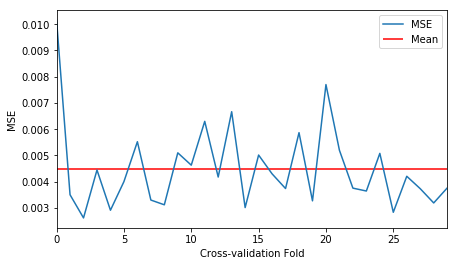

In [5]:
target = 'HilaryPercent'
fwpredictorsAIC = ['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213', 'state_abbreviation', 'SQRT_RHI225214:LOG_INC910213', 'SQRT_RHI225214:EDU685213', 'POP815213:LOG_INC910213']

kf = KFold(30, shuffle=True)
print(kf)

formula = "{} ~ {} + 1".format(target, ' + '.join(fwpredictorsAIC))
print(formula)

result = CrossValidation(formula, kf, df, target)
print(result)

kfoldplot(result)

# forward selection with BIC

In [6]:
fwmodelBIC = forward('HilaryPercent', candidates, df, 'BIC')
print(fwmodelBIC.summary())

['state_abbreviation:SQRT_RHI225214']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation', 'EDU685213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation', 'EDU685213', 'EDU685213:LOG_INC910213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation', 'EDU685213', 'EDU685213:LOG_INC910213', 'POP815213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation', 'EDU685213', 'EDU685213:LOG_INC910213', 'POP815213', 'SQRT_RHI225214:POP815213']
                            OLS Regression Results                            
Dep. Variable:          HilaryPercent   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     152.8
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:05:30   Log-Likelihood:                 3324.4
N

KFold(n_splits=30, random_state=None, shuffle=True)
HilaryPercent ~ state_abbreviation:SQRT_RHI225214 + state_abbreviation + EDU685213 + EDU685213:LOG_INC910213 + POP815213 + SQRT_RHI225214:POP815213 + 1


C:\Users\joechongwk\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\joechongwk\Anaconda3\lib\site-packages\pandas\core\indexing.py:116: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


          R2       AR2          AIC          BIC       MSE
0   0.840756  0.835056 -6252.781088 -5766.885336  0.004690
1   0.840609  0.834905 -6240.528520 -5754.632768  0.004546
2   0.839978  0.834250 -6223.333747 -5737.437995  0.003118
3   0.842040  0.836386 -6265.848327 -5779.952575  0.005320
4   0.840173  0.834452 -6255.006688 -5769.110936  0.004796
5   0.839626  0.833889 -6231.762157 -5745.831456  0.003476
6   0.839799  0.834065 -6222.795871 -5736.900120  0.003127
7   0.840927  0.835233 -6233.155723 -5747.259971  0.003694
8   0.839472  0.833727 -6240.069031 -5754.173279  0.004040
9   0.843330  0.837723 -6279.735872 -5793.840120  0.006043
10  0.839587  0.833845 -6229.283117 -5743.387365  0.003432
11  0.841710  0.836045 -6255.691445 -5769.795693  0.004746
12  0.840020  0.834294 -6234.416865 -5748.521113  0.003684
13  0.841236  0.835554 -6240.003510 -5754.107758  0.004005
14  0.841062  0.835374 -6235.436962 -5749.541211  0.003810
15  0.841051  0.835365 -6239.939072 -5754.008371  0.0038

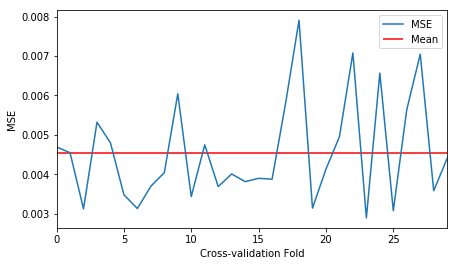

In [7]:
target = 'HilaryPercent'
fwpredictorsBIC = ['state_abbreviation:SQRT_RHI225214', 'state_abbreviation', 'EDU685213', 'EDU685213:LOG_INC910213', 'POP815213', 'SQRT_RHI225214:POP815213']
kf = KFold(30, shuffle=True)
print(kf)

formula = "{} ~ {} + 1".format(target, ' + '.join(fwpredictorsBIC))
print(formula)

result = CrossValidation(formula, kf, df, target)
print(result)

kfoldplot(result)

# forward selection with adjusted R2

In [8]:
fwmodelAR2 = forward('HilaryPercent', candidates, df, 'AR2')
fwmodelAR2.summary()

['state_abbreviation:SQRT_RHI225214']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213', 'state_abbreviation']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213', 'state_abbreviation', 'SQRT_RHI225214:LOG_INC910213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213',

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HilaryPercent   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     72.36
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:06:46   Log-Likelihood:                 3511.7
No. Observations:                2492   AIC:                            -6623.
Df Residuals:                    2292   BIC:                            -5459.
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.4350      1.202      1.194      0.233      -0.921       3.791
state_abbreviation[T.AR]                  0.9354      1.350      0.693      0.489      -1.713       3.584
state_abbreviation[T.AZ]                  0.8956      2.188      0.409      0.682      -3.395       5.186
state_abbreviation[T.CA]                 -1.9116      1.450     -1.318      0.187      -4.755       0.932
state_abbreviation[T.CO]                  0.8474      1.330      0.637      0.524      -1.760       3.455
state_abbreviation[T.DE]                 -0.0084      0.013     -0.665      0.506      -0.033       0.016
state_abbreviation[T.FL]                 -2.6847      1.443     -1.860      0.063      -5.515       0.145
state_abbreviation[T.GA]                 -0.0675      1.139     -0.059      0.953      -2.302       2.167
state_abbreviation[T.HI]                  0.0525      0.166      0.317      0.751      -0.272       0.377
state_abbreviation[T.IA]                  0.3865      1.458      0.265      0.791      -2.473       3.246
state_abbreviation[T.ID]                  1.9236      1.484      1.296      0.195      -0.986       4.833
state_abbreviation[T.IL]                 -0.4942      1.301     -0.380      0.704      -3.045       2.056
state_abbreviation[T.IN]                 -0.3188      1.372     -0.232      0.816      -3.010       2.372
state_abbreviation[T.KY]                  0.6398      1.218      0.525      0.599      -1.749       3.028
state_abbreviation[T.LA]                  0.2087      1.318      0.158      0.874      -2.375       2.792
state_abbreviation[T.MD]                  0.2729      1.610      0.170      0.865      -2.884       3.430
state_abbreviation[T.MI]                 -1.8013      1.422     -1.267      0.205      -4.589       0.987
state_abbreviation[T.MO]                 -0.5387      1.269     -0.424      0.671      -3.028       1.950
state_abbreviation[T.MS]                  1.0713      1.218      0.879      0.379      -1.318       3.460
state_abbreviation[T.MT]                 -1.1527      1.318     -0.874      0.382      -3.738       1.433
state_abbreviation[T.NC]                 -0.9071      1.287     -0.705      0.481      -3.431       1.617
state_abbreviation[T.NE]                 -2.7265      1.355     -2.012      0.044      -5.384      -0.069
state_abbreviation[T.NJ]                  3.3996      5.406      0.629      0.530      -7.202      14.001
state_abbreviation[T.NM]                 -1.1741      1.398     -0.840      0.401      -3.916       1.568
state_abbreviation[T.NV]                  0.1490      1.767      0.084      0.933      -3.316       3.614
state_abbreviation[T.NY]                  0.4870      1.340      0.363      0.716      -2.142       3.116
state_abb

KFold(n_splits=30, random_state=None, shuffle=True)
HilaryPercent ~ state_abbreviation:SQRT_RHI225214 + state_abbreviation:LOG_INC910213 + state_abbreviation:EDU685213 + state_abbreviation:POP815213 + EDU685213:LOG_INC910213 + state_abbreviation + SQRT_RHI225214:LOG_INC910213 + SQRT_RHI225214:EDU685213 + POP815213:LOG_INC910213 + 1


C:\Users\joechongwk\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\joechongwk\Anaconda3\lib\site-packages\pandas\core\indexing.py:116: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


          R2       AR2          AIC          BIC       MSE
0   0.862962  0.850578 -6364.751055 -5207.939654  0.003534
1   0.863447  0.851106 -6390.550960 -5233.739559  0.007027
2   0.862791  0.850397 -6356.254120 -5199.359473  0.003333
3   0.865934  0.853824 -6420.181342 -5263.286695  0.006153
4   0.862963  0.850584 -6349.219634 -5192.324987  0.002716
5   0.862846  0.850457 -6373.279090 -5216.384443  0.003634
6   0.864841  0.852699 -6381.903819 -5230.793645  0.004608
7   0.862027  0.849564 -6368.117206 -5211.222558  0.003637
8   0.865214  0.853039 -6415.062727 -5258.168080  0.006412
9   0.864069  0.851790 -6380.420924 -5223.526277  0.003997
10  0.862946  0.850566 -6363.200639 -5206.305992  0.003200
11  0.864024  0.851741 -6385.415955 -5228.521308  0.004515
12  0.861472  0.848958 -6349.998956 -5193.104309  0.002791
13  0.863157  0.850874 -6371.624533 -5220.348801  0.003288
14  0.863306  0.850958 -6365.332259 -5208.437612  0.004029
15  0.864293  0.852035 -6393.007150 -5236.112503  0.0048

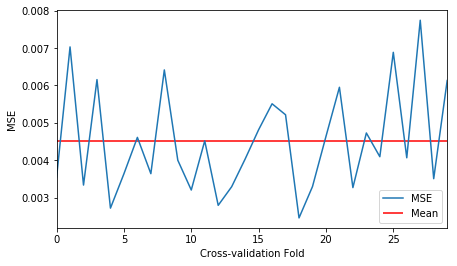

In [9]:
target = 'HilaryPercent'
fwpredictorsAR2 = ['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213', 'state_abbreviation', 'SQRT_RHI225214:LOG_INC910213', 'SQRT_RHI225214:EDU685213', 'POP815213:LOG_INC910213']
kf = KFold(30, shuffle=True)
print(kf)

formula = "{} ~ {} + 1".format(target, ' + '.join(fwpredictorsAR2))
print(formula)

result = CrossValidation(formula, kf, df, target)
print(result)

kfoldplot(result)

# forward selection with R2

In [10]:
fwmodelR2 = forward('HilaryPercent', candidates, df, 'R2')
fwmodelR2.summary()

['state_abbreviation:SQRT_RHI225214']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213', 'state_abbreviation']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213', 'state_abbreviation', 'SQRT_RHI225214:LOG_INC910213']
['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213',

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          HilaryPercent   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     71.61
Date:                Sun, 29 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:07:44   Log-Likelihood:                 3512.2
No. Observations:                2492   AIC:                            -6620.
Df Residuals:                    2290   BIC:                            -5445.
Df Model:                         201                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 1.3983      1.209      1.156      0.248      -0.973       3.770
state_abbreviation[T.AR]                  0.9712      1.352      0.718      0.473      -1.680       3.623
state_abbreviation[T.AZ]                  0.9793      2.191      0.447      0.655      -3.317       5.276
state_abbreviation[T.CA]                 -1.7746      1.458     -1.217      0.224      -4.634       1.084
state_abbreviation[T.CO]                  0.9231      1.333      0.692      0.489      -1.691       3.538
state_abbreviation[T.DE]                 -0.0081      0.013     -0.632      0.527      -0.033       0.017
state_abbreviation[T.FL]                 -2.6586      1.444     -1.841      0.066      -5.490       0.173
state_abbreviation[T.GA]                 -0.0029      1.142     -0.003      0.998      -2.243       2.237
state_abbreviation[T.HI]                  0.0550      0.166      0.332      0.740      -0.270       0.380
state_abbreviation[T.IA]                  0.4514      1.461      0.309      0.757      -2.414       3.317
state_abbreviation[T.ID]                  2.0212      1.488      1.358      0.174      -0.897       4.939
state_abbreviation[T.IL]                 -0.4430      1.303     -0.340      0.734      -2.998       2.112
state_abbreviation[T.IN]                 -0.2505      1.375     -0.182      0.855      -2.947       2.445
state_abbreviation[T.KY]                  0.6919      1.223      0.566      0.571      -1.705       3.089
state_abbreviation[T.LA]                  0.2380      1.319      0.181      0.857      -2.348       2.824
state_abbreviation[T.MD]                  0.3323      1.612      0.206      0.837      -2.828       3.493
state_abbreviation[T.MI]                 -1.7513      1.424     -1.230      0.219      -4.543       1.041
state_abbreviation[T.MO]                 -0.4826      1.273     -0.379      0.705      -2.979       2.013
state_abbreviation[T.MS]                  1.0926      1.219      0.896      0.370      -1.298       3.483
state_abbreviation[T.MT]                 -1.0841      1.323     -0.819      0.413      -3.678       1.510
state_abbreviation[T.NC]                 -0.8302      1.291     -0.643      0.520      -3.362       1.702
state_abbreviation[T.NE]                 -2.6523      1.361     -1.949      0.051      -5.321       0.016
state_abbreviation[T.NJ]                  3.3698      5.419      0.622      0.534      -7.256      13.996
state_abbreviation[T.NM]                 -0.9832      1.414     -0.695      0.487      -3.756       1.790
state_abbreviation[T.NV]                  0.2362      1.770      0.133      0.894      -3.235       3.708
state_abbreviation[T.NY]                  0.6447      1.355      0.476      0.634      -2.013       3.302
state_abb

KFold(n_splits=30, random_state=None, shuffle=True)
HilaryPercent ~ state_abbreviation:SQRT_RHI225214 + state_abbreviation:LOG_INC910213 + state_abbreviation:EDU685213 + state_abbreviation:POP815213 + EDU685213:LOG_INC910213 + state_abbreviation + SQRT_RHI225214:LOG_INC910213 + SQRT_RHI225214:EDU685213 + POP815213:LOG_INC910213 + SQRT_RHI225214:POP815213 + POP815213:EDU685213 + 1


C:\Users\joechongwk\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\joechongwk\Anaconda3\lib\site-packages\pandas\core\indexing.py:116: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


          R2       AR2          AIC          BIC       MSE
0   0.861583  0.849006 -6347.761310 -5185.165852  0.002864
1   0.862517  0.850024 -6347.685297 -5185.089839  0.004155
2   0.861909  0.849304 -6358.995213 -5190.447575  0.003088
3   0.865771  0.853513 -6430.756165 -5262.292571  0.007645
4   0.862428  0.849864 -6369.240767 -5200.777174  0.004106
5   0.864080  0.851735 -6415.342712 -5252.663592  0.007207
6   0.863762  0.851320 -6393.997821 -5225.534228  0.007799
7   0.862997  0.850486 -6366.231449 -5197.767855  0.003607
8   0.865610  0.853338 -6426.202317 -5257.738723  0.006007
9   0.862391  0.849824 -6347.917932 -5179.454338  0.002874
10  0.863021  0.850518 -6352.495323 -5183.947685  0.002728
11  0.865053  0.852729 -6390.168918 -5221.705325  0.004564
12  0.864561  0.852192 -6383.597089 -5215.133495  0.004285
13  0.863929  0.851570 -6395.931860 -5233.252740  0.005085
14  0.863896  0.851473 -6392.957143 -5224.409506  0.004495
15  0.861909  0.849367 -6362.521740 -5199.842620  0.0032

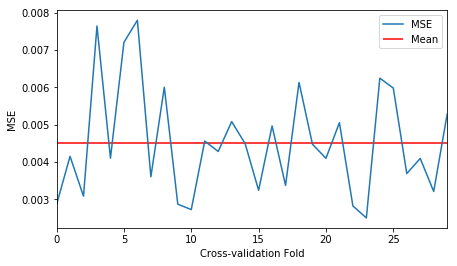

In [11]:
target = 'HilaryPercent'
fwpredictorsR2 = ['state_abbreviation:SQRT_RHI225214', 'state_abbreviation:LOG_INC910213', 'state_abbreviation:EDU685213', 'state_abbreviation:POP815213', 'EDU685213:LOG_INC910213', 'state_abbreviation', 'SQRT_RHI225214:LOG_INC910213', 'SQRT_RHI225214:EDU685213', 'POP815213:LOG_INC910213', 'SQRT_RHI225214:POP815213', 'POP815213:EDU685213']

kf = KFold(30, shuffle=True)
print(kf)

formula = "{} ~ {} + 1".format(target, ' + '.join(fwpredictorsR2))
print(formula)

result = CrossValidation(formula, kf, df, target)
print(result)

kfoldplot(result)

# QQ plot and regresion plots

<Figure size 432x432 with 0 Axes>

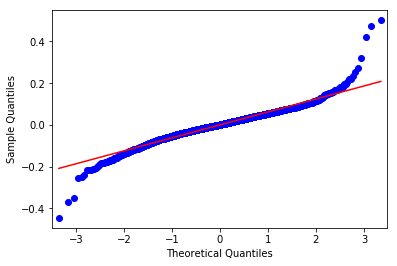

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

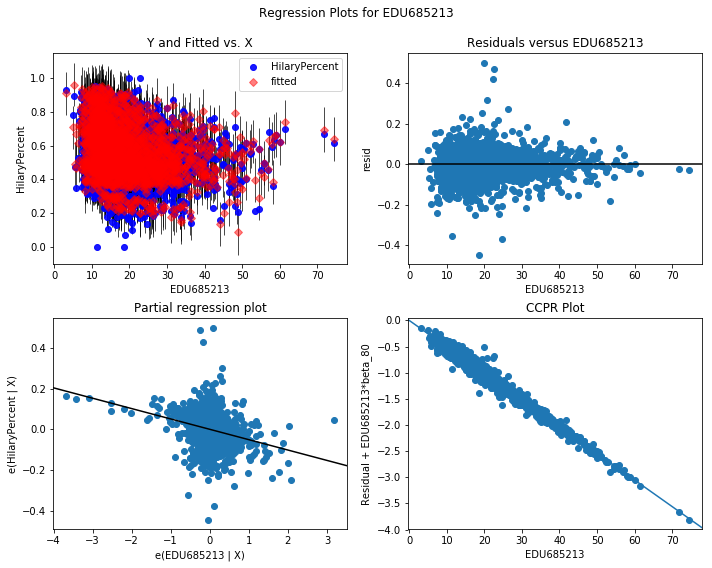

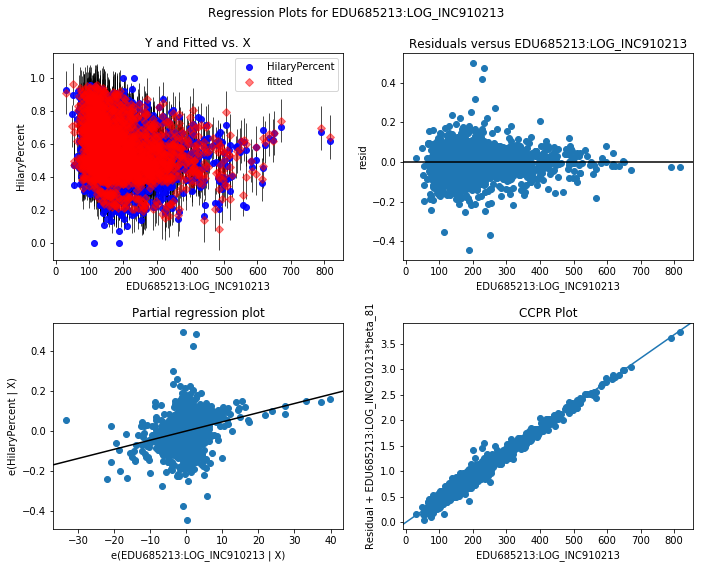

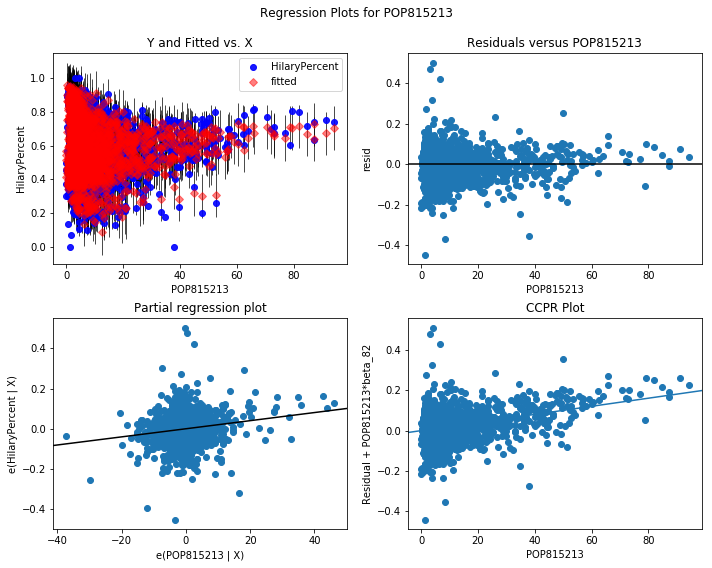

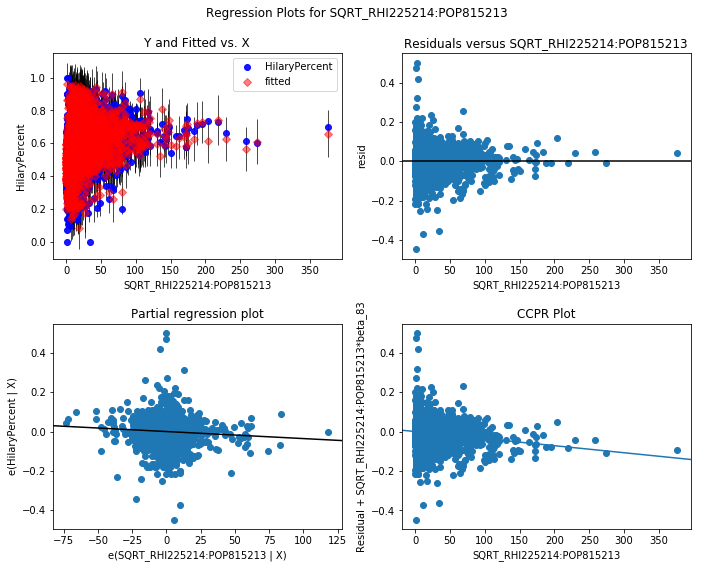

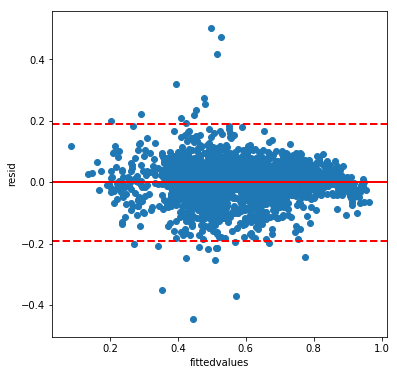

In [43]:
fig = plt.figure(figsize=(6,6))
fig = sm.qqplot(fwmodelBIC.resid, stats.distributions.norm, line='r') 

for i in fwpredictorsBIC:
    try:
        fig = plt.figure(figsize=(10,8))
        fig = sm.graphics.plot_regress_exog(fwmodelBIC, i , fig=fig)
    except:
        pass
    
fig = plt.figure(figsize=(6,6))
plt.scatter(fwmodelBIC.fittedvalues, fwmodelBIC.resid)

plt.ylabel('resid')
plt.xlabel('fittedvalues') 

plt.axhline(y=0, linewidth=2, color = 'r')
plt.axhline(y=fwmodelBIC.resid.mean() + 3 * fwmodelBIC.resid.std(), linestyle='dashed', linewidth=2, color = 'r')
plt.axhline(y=fwmodelBIC.resid.mean() - 3 * fwmodelBIC.resid.std(), linestyle='dashed', linewidth=2, color = 'r')

In [60]:
# Variance Inflation Factor
vif = []
for i in range(len(fwpredictorsBIC)):
    vif.append(sms.outliers_influence.variance_inflation_factor(fwmodelBIC.model.exog, i))

df = pd.DataFrame({'Variable': fwpredictorsBIC, 'VIF': vif})

df.sort_values('VIF', ascending=False)

,Variable,VIF
0,state_abbreviation:SQRT_RHI225214,262.669953
5,SQRT_RHI225214:POP815213,46.558504
2,EDU685213,11.710197
3,EDU685213:LOG_INC910213,11.463512
4,POP815213,10.176760
1,state_abbreviation,9.662661


# Influence Plot

C:\Users\joechongwk\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
C:\Users\joechongwk\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\joechongwk\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\joechongwk\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\joechongwk\Anaconda3\lib\site-packages\numpy\core\_methods.py:153: RuntimeWarning: invalid value encountered in reduce
  umr_maximum(a, axis, None, out, keepdims),
C:\Users\joechongwk\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: 

ValueError: cannot convert float NaN to integer

<Figure size 576x432 with 1 Axes>

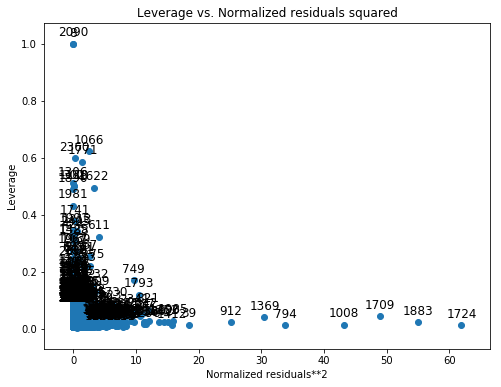

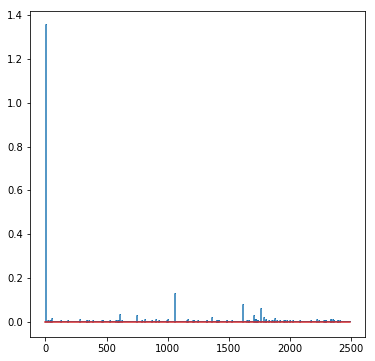

In [61]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(fwmodelBIC, ax=ax, criterion="cooks")

fig1, ax = plt.subplots(figsize=(8,6))
fig1 = sm.graphics.plot_leverage_resid2(fwmodelBIC, ax=ax)

# get the influence measure
influence = fwmodelBIC.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
fig = plt.figure(figsize=(6,6))
fig = plt.stem(np.arange(len(c)), c, markerfmt=",") 

# Predicting the test data

In [12]:
test_data = pd.read_csv('P1test.csv', header=0)

test_data['SQRT_RHI225214'] = np.power(test_data['RHI225214'],0.5)
test_data['LOG_INC910213'] = np.log(test_data['INC910213'])

y_pred = fwmodelBIC.predict(test_data)
y_pred.rename('A0209349X', inplace=True)

y_pred.to_csv('A0209349X_Step2.csv', index = 0, header=1)

In [13]:
print(y_pred)

0      0.732491
1      0.719773
2      0.536558
3      0.412033
4      0.927175
5      0.523096
6      0.516638
7      0.699495
8      0.605713
9      0.408404
10     0.524332
11     0.837316
12     0.439755
13     0.423351
14     0.529352
15     0.709226
16     0.473958
17     0.409704
18     0.403929
19     0.518832
20     0.709716
21     0.571964
22     0.477124
23     0.540586
24     0.490899
25     0.452006
26     0.375605
27     0.525525
28     0.406973
29     0.420863
         ...   
270    0.552671
271    0.487735
272    0.868694
273    0.492903
274    0.523644
275    0.511126
276    0.155614
277    0.600616
278    0.475751
279    0.395807
280    0.689815
281    0.496025
282    0.363756
283    0.358217
284    0.560610
285    0.478375
286    0.629651
287    0.721630
288    0.762972
289    0.524747
290    0.677886
291    0.428780
292    0.679666
293    0.728925
294    0.178664
295    0.469638
296    0.600417
297    0.773595
298    0.365089
299    0.537606
Name: A0209349X, Length: